# Titanic Challenge with Logistic Regression

# Import relevant libraries

Pandas is for data manipulation using DataFrame <br>
Numpy is for numeric calculations <br>
sklearn.ensemble imports the model <br>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Import data into notebook

In [9]:
train_data = pd.read_csv("titanic/data/train.csv")

test_data = pd.read_csv("titanic/data/test.csv")

# Insights

### Women
Because women usually are the first to be protected in those times, it's interesting to see the rate of survival for women. <br>

In [10]:
women_survived = train_data.loc[train_data.Sex == 'female']['Survived']

rate_women_survived = sum(women_survived)/len(women_survived)

rate_women_survived

0.7420382165605095

In [11]:
men_survived = train_data.loc[train_data.Sex == 'male']["Survived"]

rate_men_survived = sum(men_survived)/len(men_survived)

rate_men_survived

0.18890814558058924

## Data exploration

Combining the two datasets (train, test) for exploratory analysis

In [12]:
merged_train_test = pd.concat(
    [
        train_data.drop(["PassengerId", "Survived"], axis=1), 
        test_data.drop(["PassengerId"], axis=1),
    ]
)
y_train = train_data["Survived"].values

Check for missing values

In [13]:
print(merged_train_test.isna().sum())

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


## Info on the merged set

In [14]:
merged_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [86]:
merged_train_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


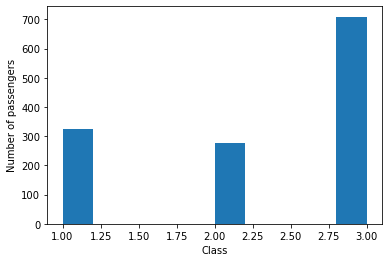

In [90]:
_ = passenger_class = merged_train_test['Pclass']
_ = plt.hist(passenger_class)
plt.ylabel('Number of passengers')
plt.xlabel('Class')
plt.show()

## Info on the training set

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Information on the 11 features of the dataset

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [55]:
sex_data = pd.get_dummies(train_data["Sex"])

In [59]:
sex_data.describe()

,female,male
count,891.000000,891.000000
mean,0.352413,0.647587
std,0.477990,0.477990
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [52]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Remarks about the dataset

38% of the passengers survived (check mean) <br>
0.4 years old was the min age and 80 was the max age <br>
The min fare was 32 while the max was 512 <br>
The spread in the fare was a 49 <br>
34% of the passengers were women while 64% were man <br>

In [84]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_temp = train_data.isnull().sum()/train_data.isnull().count()*100
percent_missing_values = round(percent_temp, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_missing_values], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


## Graphical Analysis

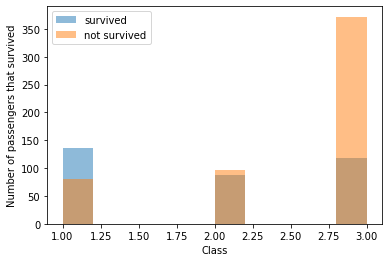

In [110]:
passenger_class_not_survived = train_data[train_data['Survived'] == 0]['Pclass']
passenger_class_survived = train_data[train_data['Survived'] == 1]['Pclass']
_ = plt.ylabel('Number of passengers that survived')
_ = plt.xlabel('Class')
_ = plt.hist(passenger_class_survived, alpha=0.5, label='survived')
_ = plt.hist(passenger_class_not_survived, alpha=0.5, label='not survived')
_ = plt.legend(loc='upper left')
plt.show()

# Feature engineering

Because Age and Cabin have lots of missing values, it could be a good idea to remove them from the dataset

In [15]:
merged_train_test.drop(['Age', 'Cabin'], axis=1)

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S


# Preparing data for training the model

In [16]:
y = train_data["Survived"]

In [17]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

In [18]:
X = pd.get_dummies(train_data[features])

In [19]:
X_test = pd.get_dummies(test_data[features])

In [20]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [21]:
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [22]:
predictions = model.predict(X_test)

In [23]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
print(train_data['Age'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool


In [25]:
age_is_null = train_data['Age'].isnull()

In [26]:
age_is_empty = [x for x in age_is_null if x]

In [27]:
len(age_is_empty)

177

In [28]:
features

['Pclass', 'Sex', 'SibSp', 'Parch']

In [29]:
features.append('Cabin')

In [30]:
def prepare_data():
    global X, X_test
    X = pd.get_dummies(train_data[features])
    X_test = pd.get_dummies(test_data[features])

In [31]:
prepare_data()

In [32]:
age_is_null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [33]:
train_data[age_is_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [34]:
no_age = train_data[age_is_null]

In [35]:
age_is_null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [36]:
age_is_not_null = train_data['Age'].notnull()

In [37]:
age_is_not_null

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [38]:
with_age = train_data[age_is_not_null]

In [39]:
with_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
len(no_age)

177

In [41]:
len(with_age)

714

In [42]:
type(2)

int

In [43]:
type(with_age)

pandas.core.frame.DataFrame

In [44]:
with_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
age = train_data['Age']

In [46]:
type(age)

pandas.core.series.Series

In [47]:
age.map

<bound method Series.map of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [48]:
age.map(lambda x: print(x))

22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Age, Length: 891, dtype: object

In [49]:
import math

In [50]:
math.isnan(nan)

NameError: name 'nan' is not defined

In [ ]:
filled_age = age.map(lambda x: x if math.isnan(x) == False else 28)

In [ ]:
age

In [ ]:
filled_age.head()

In [ ]:
filled_age[6]

In [ ]:
filled_age

In [ ]:
filled_age

In [ ]:
type(filled_age)

In [ ]:
type(X)

In [ ]:
X.head()

In [ ]:
features

In [ ]:
features.append('Age')

In [ ]:
features

In [ ]:
prepare_data()

In [ ]:
X.head()

In [ ]:
X['Age']

In [ ]:
X['Age'] = filled_age

In [ ]:
X.head()

In [ ]:
X['Age'].isnull()

In [ ]:
age

In [ ]:
X['Age']

In [ ]:
prepare_data()

In [ ]:
def train_model():
    global predictions, X, y, X_test
    model.fit(X, y)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission.csv', index=False)
    print("Your submission was successfully saved!")

In [ ]:
model.fit(X, y)

In [ ]:
X['Age']

In [ ]:
X['Age'] = filled_age

In [ ]:
X['Age']

In [ ]:
model.fit(X, y)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test

In [ ]:
def fill_age(age_list, value):
    return age_list.map(lambda x: x if math.isnan(x) == False else value)

In [ ]:
X_test['Age'] = fill_age(X_test['Age'], 28)

In [ ]:
model.predict(X_test)

In [ ]:
def output_predictions(test_data, predictions, message):
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission_' + message + '.csv', index=False)
    print("Your submission " + message + " was successfully saved!")

In [ ]:
output_predictions(test_data, predictions, "age_with_average")

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
test_data

In [ ]:
output_predictions(test_data, predictions, "age_with_average")